In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
''' Linear Regression '''
# Load the Ads dataset
df = pd.read_csv("2930952.csv")

In [48]:
#2
print(df.shape)
print(df.describe())
df = df.dropna()

(365, 5)
             TMAX        TMIN
count  365.000000  365.000000
mean    61.728767   45.315068
std     21.086305   19.043239
min      4.000000   -7.000000
25%     44.000000   31.000000
50%     62.000000   44.000000
75%     80.000000   63.000000
max     95.000000   77.000000


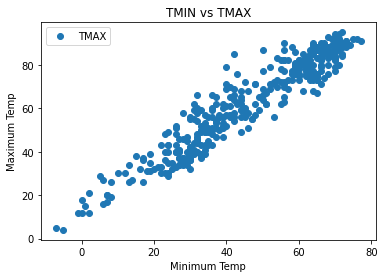

In [49]:
#3
df.plot(x='TMIN', y='TMAX', style='o')  
plt.title('TMIN vs TMAX')  
plt.xlabel('Minimum Temp')  
plt.ylabel('Maximum Temp')  
plt.show()

In [50]:
#4
X = df['TMIN'].values.reshape(-1,1) 
print(X[:10])
print('')
y = df['TMAX'].values.reshape(-1,1)
print(y[:10])

[[19]
 [28]
 [26]
 [24]
 [29]
 [31]
 [33]
 [30]
 [28]
 [24]]

[[35]
 [35]
 [33]
 [30]
 [37]
 [39]
 [38]
 [36]
 [37]
 [29]]


In [53]:
#5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.80, random_state=1)

In [54]:
#6 
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [55]:
#7
#intercept
print(linear.intercept_)

#slope
print(linear.coef_)


[12.9043154]
[[1.06702284]]


In [62]:
#8
test_X = np.array(9).reshape(-1, 1)
linear.predict(test_X) 

array([[22.50752092]])

In [64]:
#9
predictions = linear.predict(X_test)

In [72]:
#10
dfp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
dfp[:10]

,Actual,Predicted
0,40,37.445841
1,91,90.796982
2,88,74.791640
3,77,87.595914
4,57,56.652252
5,43,38.512863
6,82,73.724617
7,88,87.595914
8,66,47.049046
9,39,45.982023


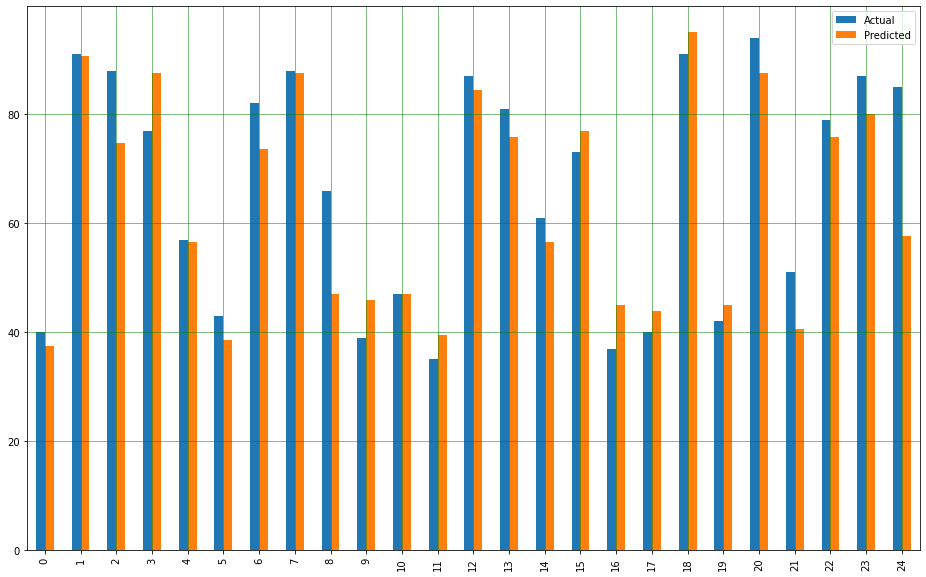

In [74]:
#11
df2 = dfp.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

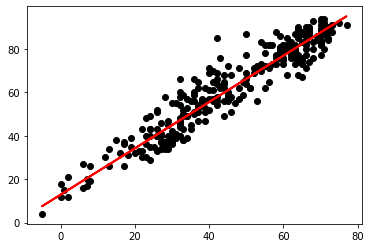

In [76]:
#12
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.show()

In [85]:
#13
print('Mean_Absolute Error: %.2f' % mean_absolute_error(y_test,predictions))  
print('Mean Squared Error: %.2f'
      % mean_squared_error(y_test, predictions))

print("Standard Error: %.2f" % np.sqrt(mean_squared_error(y_test, predictions)))

print('Coefficient of determination, 1 is perfect prediction: %.2f'
      % r2_score(y_test, predictions))

Mean_Absolute Error: 5.07
Mean Squared Error: 42.02
Standard Error: 6.48
Coefficient of determination, 1 is perfect prediction: 0.90
